# The phase portrait

In this section, we introduce the phase portrait representation of an autonomous ODE. This is a plot of the solution *state space*, illustrating any equilibrium points and selected trajectories. We usually do not need to solve the ODE to obtain the phase portrait.

We train ourselves to understand the behaviour from looking at the phase plane, because we can often construct the phase plane even when there is no exact solution.

(motv-exam)=
## A motivating example in 1D
Consider the following ODE, subject to the given initial condition :

\begin{equation}
\dot{x}=2x, \qquad x(0)=x_0.
\end{equation}

We can solve this problem by separation of variables to obtain a family of solution curves, each corresponding to different values of the initial condition:

\begin{equation}
x = x_0 e^{2t}.
\end{equation}

Notice that for this example,

* if $x_0 >0$ then $x$ is always strictly increasing (monotonic increasing)
* if $x_0 <0$ then $x$ is always strictly decreasing (monotonic decrasing)
* if $x_0=0$ then the $x=0$ $\forall t$. This is an equilibrium point.

```{admonition} Equilibrium point (1D)
:class: theorem
For a system described by $\dot{x}=f(x)$, a point where $f(x)=0$ is called an **equilibrium point**.

If an equilibrium point is given as the initial condition then the system will remain there for all time. We are usually interested to know how the system behaves when it is near to equilibrium.
```

**Below-left diagram:**

We could infer the behaviour from the ODE without solving it by looking at a graph of $(x,\dot{x})$. To the right of the equilibrium, $\dot{x}$ is positive and therefore $x$ is increasing. To the left of the equilibrium $\dot{x}$ is negative and therefore $x$ is decreasing.

**Below-right diagram:**

For this system the real number line represents the **state space** of possible values that the solution $x(t)$ can take. The direction of change at each point in state space is shown using arrows.

On $x>0$ the change vector points in the direction of increasing $x$, and on $x<0$ the change vector points in the direction of decreasing $x$. The change vector only swaps sign (direction) at the equilibrium point.

<br>

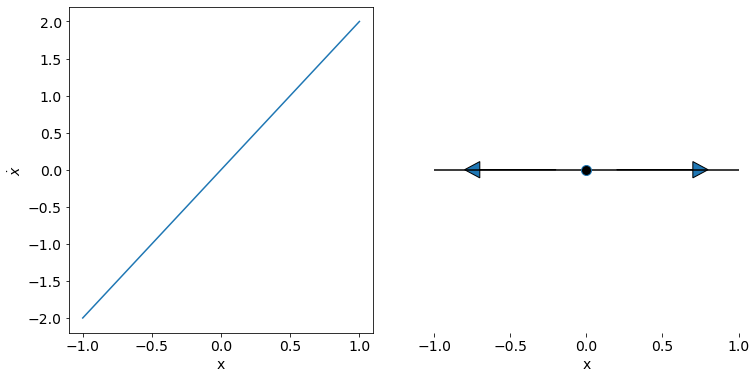

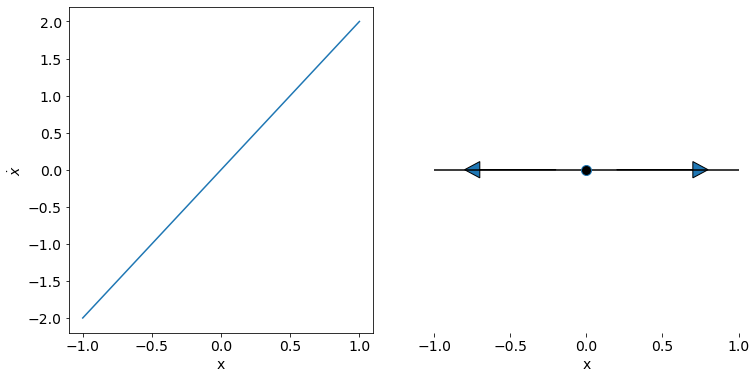

In [1]:
from myst_nb import glue
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

x = np.linspace(-1,1)

fig,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(x,2*x)
ax[0].set_xlabel('x')
ax[0].set_ylabel('$\dot{x}$')
ax[1].plot([-1,1],[0,0],'k')
ax[1].plot([0], [0], marker="o", markersize=10, markerfacecolor="black")
ax[1].arrow(-0.2, 0, -0.5, 0,head_width=0.2,head_length=0.1)
ax[1].arrow(0.2, 0, 0.5, 0,head_width=0.2,head_length=0.1)
ax[1].set_ylim(-2, 2)
ax[1].set_xlim([-1,1])
ax[1].yaxis.set_visible(False)
plt.box(on=None)
ax[1].set_xlabel('x')

glue("simple_fig", fig, display=False)

 ```{glue:} simple_fig
 ```
<br>

The state space diagram provides a qualitative view of the ordinary differential equation, from only a one-dimensional image. We can infer from the state space diagram that the point $x=0$ is an equilibrium point, and moreover that it is **unstable**. If we provide an initial condition near to the equilibrium point, the system will move away from the equilibrium.

The diagram also provides information about how the system will behave for all possible initial conditions.

```{exercise}
By hand, try to produce a similar sketch of the state space for the following nonlinear ODE, assuming that $0<a<k$ and that $r>0$:

 \begin{equation*}
x'=rx\left(1-\frac{x}{k}\right)\left(\frac{x}{a}-1\right)
 \end{equation*}

This famous equation models the Allee effect. What are the equilibrium points of this ODE and which of them are stable/unstable?
```

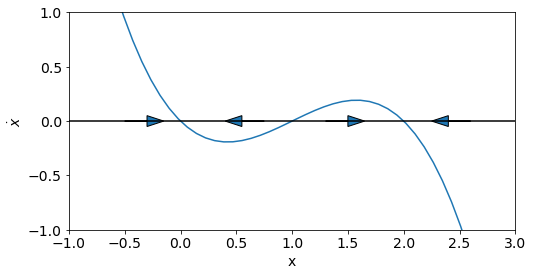

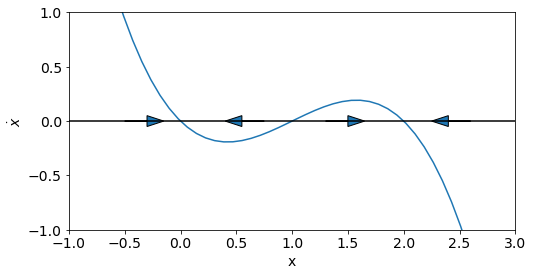

In [2]:
from myst_nb import glue
import numpy as np
import matplotlib.pyplot as plt

a=1; k=2; r=1;

x = np.linspace(-1,3)

fig,ax = plt.subplots(figsize=(8,4))
ax.plot(x,r*x*(1-x/k)*(x/a-1))
ax.plot([-1,3],[0,0],'k')
ax.arrow(-0.5, 0, 0.2, 0,head_width=0.1)
ax.arrow(0.75, 0, -0.2, 0,head_width=0.1)
ax.arrow(1.3, 0, 0.2, 0,head_width=0.1)
ax.arrow(2.6, 0, -0.2, 0,head_width=0.1)
ax.set_ylim([-1, 1])
ax.set_xlim([-1,3])
ax.set_xlabel('x')
ax.set_ylabel('$\dot{x}$')

glue("allee_fig", fig, display=False)

````{toggle}

**Solution:**
Here the graphs of $(x,\dot{x})$ and the state space have been shown on the same diagram for ease of presentation.

* The equilibrium point at $x=0$ is stable
* The equilibrium point at $x=a$ is unstable
* The equilibrium point at $x=k$ is stable


```{glue:} allee_fig
```
````

(undamp-pend)=
## A motivating example in 2D

We now consider the equation of motion for a simple pendulum, which is given by the following nonlinear second order ODE. The term with coefficient $k$ represents frictional effects, and the term with coefficient $\omega^2$ represents the weight of the pendulum.

\begin{equation}
\ddot{x}+k\dot{x}+\omega^2\sin(x)=0
\end{equation}

We may rewrite the equation as a coupled first order system by introducing the variable $y=\dot{x}$, which gives

\begin{equation}
\begin{bmatrix}\dot{x}\\\dot{y}\end{bmatrix} = \begin{bmatrix}y\\-\omega^2\sin(x)-ky\end{bmatrix}
\end{equation}

The system has equilibrium points when $\dot{x}=\dot{y}=0$. These occur at

\begin{equation}
x=n\pi, \quad y=0, \qquad n\in\mathbb{Z}.
\end{equation}


```{admonition} Equilibrium point (2D)
:class: theorem
Equilibrium points for a system described by
\begin{align*}
\dot{x}&=f(x,y)\\
\dot{y}&=g(x,y)
\end{align*}

must satisfy $f(x,y)=g(x,y)=0$.
```

As in the previous example, we would like to investigate the behaviour of the system at points near to the equilibrium solutions. Although we could make progress investigating this system by hand, we will here illustrate the dynamics using computer plots for convenience.

<br>

**Python definition:**

We can set up the system in Python as follows. Our defined function `pend` takes an input state `X` and returns the derivatives. Our definition requires that the parameter values `w` and `k` are provided as inputs.

The independent variable `t` must also be given as an input, even though it does not appear explicitly in the equations. This is because the method we will use to solve the system expects a definition of the form `f(X,t,params)`.

In [3]:
# Model definition
import numpy as np
def pend(X,t,w,k):
  dxdt = X[1]
  dydt = -w**2*np.sin(X[0])-k*X[1]
  return [dxdt, dydt]

<br>

### Solving numerically

We can solve the system to obtain the angular displacement $x(t)$ and the velocity $y(t)$ for given parameters and initial conditions.

In the work that follows we will choose $k=0$, which means there are no losses due to friction. We will take $\omega=1$ and we will begin by choosing initial conditions $x(0)=1$, $y(0)=0$.

The solution uses the `odeint` function which is a numerical ODE solver. We specify the timepoints `t` that we require the solution value for. The solver returns `X` which is the numeric solution at those timepoints. Each column in `X` gives the solution values for one of the dependent variables, so for this system there will be two columns.

In [4]:
from scipy.integrate import odeint

# Parameter values
w=1; k=0

# Initial conditions for t,x,y
t0=0; X0=[1,0]

# time points from t0 to tmax (1000 points)
tmax=20
t = np.linspace(t0,tmax,1000)    

# solve ODE
X = odeint(pend,X0,t,args=(w,k))

<br>

### Time series plots

We can plot the time series for the given parameters and conditions, as shown below. Most of the code here is just twiddles to improve how the plot looks, such as changes to the axis limits or plot labels. The main functional part of the code is the following line that plots the timepoints `t` against the solutions for $x$, which are found in the first column of array `X`.

```{code}
plt.plot(t,X[:,0],'blue')
```

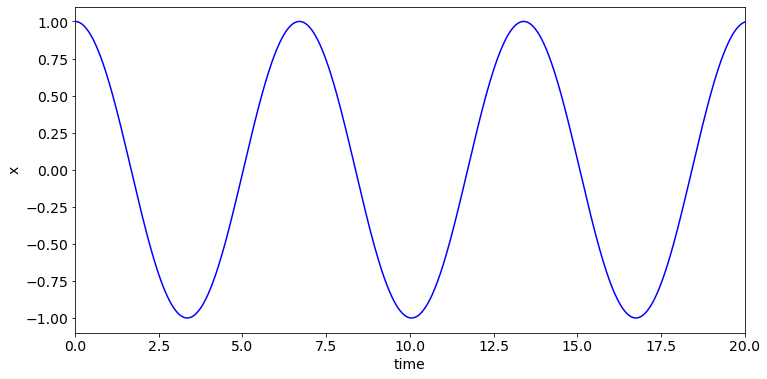

In [5]:
import matplotlib.pyplot as plt

# plot results
plt.figure(figsize=(12,6))
plt.plot(t,X[:,0],'blue')
plt.ylabel('x')
plt.xlabel('time')
plt.xlim([t0,tmax])
plt.show()

<br>

If we want to understand how the system behaves for a range of initial conditions or when subjected to a small perturbation, we would need to re-solve and compare multiple solutions. This is inconvenient.

<br>

### State space plots

We can make better progress by working in state space. This time, there are two state variables, $x$ and $y$ and so the state space is $\mathbb{R}^2$. This makes sense, because to solve a second order ODE we need to have two initial conditions. In this case we have one condition for the initial angular displacement $x(0)$ and one condition for the initial angular velocity $y(0)$.

The plot below shows the solution trajectory in state space corresponding to the parameter values and initial conditions that we used in the time series plot above.

The main functional part of the code is the following line that plots $x$ against $y$ by extracting each column from array `X`.

```{code}
plt.plot(X[:,0],X[:,1],'blue')
```

The arrows shown on this plot illustrate the direction of change. The code that was used to add the arrows to the trajectory has not been provided, because you won't need this for your work.

````{toggle}
```{code}
plt.plot(X[:,0],X[:,1],'blue')
plt.xticks([-np.pi,0,np.pi],['$-\pi$','0','$\pi$'])
plt.ylabel('y')
plt.xlabel('x')
plt.show()

```
````

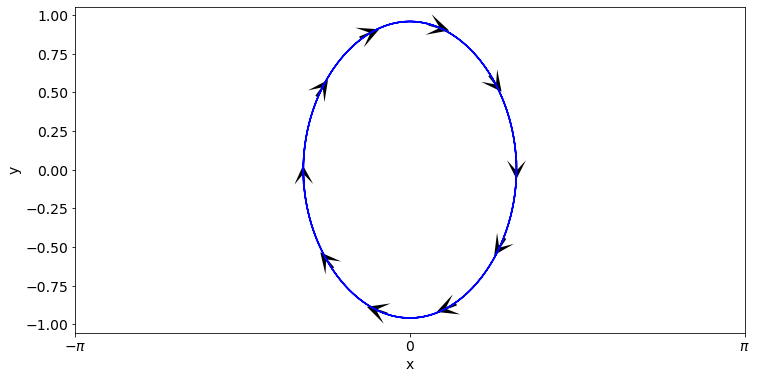

In [6]:
plt.figure(figsize=(12,6))
plt.plot(X[:,0],X[:,1],'b')

h=100
x=X[0:-1:h,0]
y=X[0:-1:h,1]
u=y
v=-w**2*np.sin(x)-k*y
plt.quiver(x,y,u,v,pivot="middle",headaxislength=5,headwidth=10,headlength=10,scale=30)

plt.xticks([-np.pi,0,np.pi],['$-\pi$','0','$\pi$'])
plt.ylabel('y')
plt.xlabel('x')

plt.show()

<br>

**Observations**

It can be seen that time series oscillations correspond to circles or ellipses in state space. This is a general result, that you should learn to recognise.

The initial condition that was used here lies at the point $(1,0)$. For these values $\dot{y}<0$ and $\dot{x}=0$ so the change vector points vertically downwards at that point as shown. For increasing time the solution evolves clockwise along the trajectory.

```{admonition} Think about it!
Try tracing your finger around the circle and consider (separately) how variables $x$ and $y$ change. Where is $x$ increasing and where is it decreasing? Which positions on the trajectory correspond to the lowest and highest parts of the pendulum swing? Where is the speed zero?
```
<br>

### The phase portrait

The plot below illustrates several solution trajectories for the undamped pendulum on the same sketch. The equilibrium points are also marked. Notice the difference in character between solution trajectories near to $x=0$ compared to those near $x=\pm\pi$. The former corresponds to the pendulum in the downward vertical position, whilst the latter corresponds to the pendulum in the upward vertical position.

Initialising the pendulum with a low/moderate speed provides backward and forward oscillations of constant amplitude (closed trajectories). However, for larger value of the initial speed the pendulum performs complete revolutions (open trajectories). The *separatrix* is the curve that separates the open and closed trajectories. It is identified on the sketch in dashed blue.

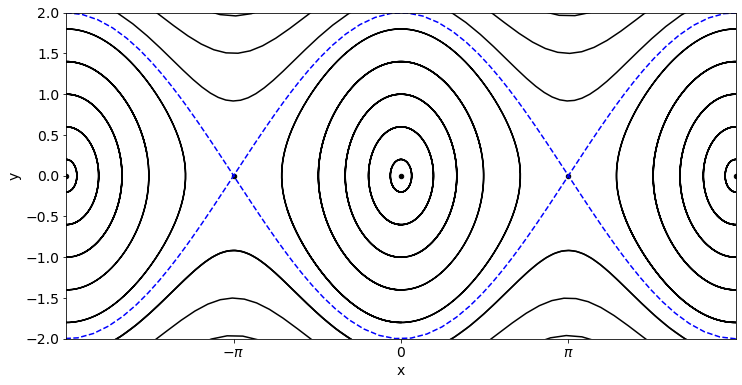

In [7]:
plt.figure(figsize=(12,6))
for j in np.arange(-2.2,0,0.4):
  for i in [-2*np.pi,0,2*np.pi]:
    X0=[i,j]
    sol = odeint(pend,X0, t,args=(w,k))
    plt.plot(sol[:,0],sol[:,1],'k')

for i in np.arange(2.2,4,0.3):
  X0=[-2*np.pi,i]
  t=np.linspace(0,150,1000)
  sol = odeint(pend,X0, t,args=(w,k))
  plt.plot(sol[:,0],sol[:,1],'k')

X0=[-2*np.pi,2]
t=np.linspace(0,150,1000)
sol = odeint(pend,X0, t,args=(w,k))
plt.plot(sol[:,0],sol[:,1],'b--')


for i in np.arange(2.2,4,0.3):
  X0=[2*np.pi,-i]
  t=np.linspace(0,150,1000)
  sol = odeint(pend,X0, t,args=(w,k))
  plt.plot(sol[:,0],sol[:,1],'k')

X0=[2*np.pi,-2]
t=np.linspace(0,150,1000)
sol = odeint(pend,X0, t,args=(w,k))
plt.plot(sol[:,0],sol[:,1],'b--')

plt.xlim(-2*np.pi,2*np.pi)
plt.ylim(-2,2)

xpt=np.pi*np.array([-2,-1,0,1,2])
ypt=np.zeros(np.shape(xpt))
plt.scatter(xpt,ypt, marker="o",s=20, c="black")

plt.xlim(-2*np.pi,2*np.pi)
plt.ylim(-2,2)
plt.xticks([-np.pi,0,np.pi],['$-\pi$','0','$\pi$'])

plt.ylabel('y')
plt.xlabel('x')
plt.show()

We can classify the equilibrium points as follows:

**Stationary point at $(0,0)$**

This point corresponds to the pendulum in a stationary downward vertical position. We can see from the diagram that the point is encircled by closed orbits, which represents periodic motion. If we intialise the pendulum in a state close the equilibrium it will oscillate, following a repeating circular trajectory forever. This type of equilibrium point is called a "centre".

**Stationary point at $(\pm\pi,0)$**

This point corresponds to the pendulum in a stationary upward vertical position. If the pendulum is started at the equilibrium point it will remain there, but if it is started from a perturbed position close to the upward vertical, it will move away. As there is no damping, the subsequent motion depends on whether the pendulum is released from rest or given a push. If it is released from rest close to the upward vertical it will perform closed oscillations. If it is given a push it may perform repeated full rotations. This type of equilibrium point is called a "saddle".

```{admonition} Terminology
:class: theorem
A plot showing a region of state space together with any equilibrium points and some indicative trajectories is called a phase portrait.

The phase portrait is useful because it shows us how the system behaves for a range of initial conditions.

Usually we also mark some of the change vectors on a phase portrait to provide further information, as discussed below.
```

### The vector field

We can also infer solution trajectories by plotting the vector field $(\dot{x},\dot{y})$ in state space. Since there is no explicit time dependence on the right-hand side, the change vectors remain static and the solution will follow a trajectory tangent to them.

In Python we can use the `quiver` function to plot the vector field, as shown below-left. It can be difficult to infer the behaviour from the vector field alone, but by combining plots of the vector field with a few solution trajectories we can usually get a good overview.

Replacing the `quiver` function with the `streamplot` function results in an attempt by Python to create the curves that are tangent to the vector field, as shown below-right.

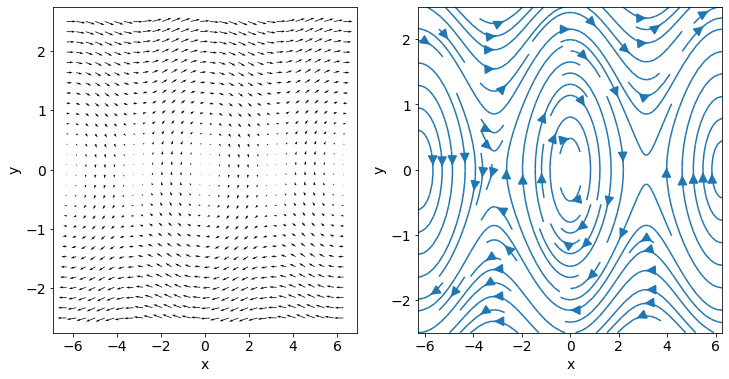

In [8]:
# Define x and y value ranges
xmin=-2*np.pi; xmax=2*np.pi;
ymin=-2.5; ymax=2.5;

# We will use 30 grid points in each direction
npts=30
x=np.linspace(xmin,xmax,npts)
y=np.linspace(ymin,ymax,npts)
[X,Y]=np.meshgrid(x,y)

# Define the vector field values at each point
(U,V)=(Y,-np.sin(X))

# Make and twiddle the plot
fig,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].quiver(X,Y,U,V)
ax[1].streamplot(X,Y,U,V,arrowsize=2)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
plt.show()

The quality of the streamplots is usually not very satisfactory unless additional painstaking work is undertaken to force a better result. An example of a better result is shown below.

However, by combining  rough-and-ready streamplots with mathematical analysis we can usually get a very clear understanding of the system dynamics.

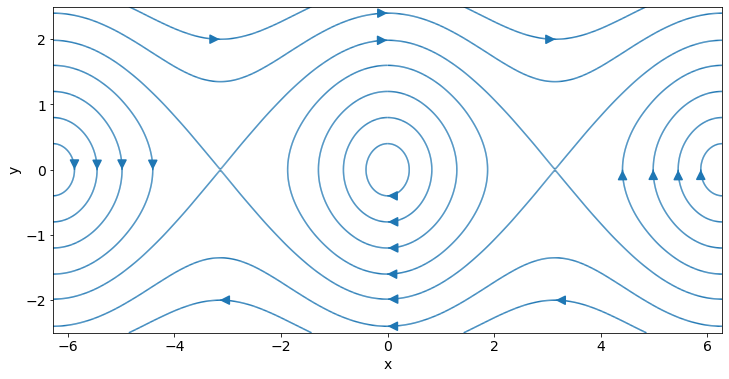

In [9]:
plt.figure(figsize=(12,6))

# Define trajectory start points
start=[
       [-np.pi,0.01],[np.pi,-0.01],[-2*np.pi,2.4],[2*np.pi,-2.4],
       [-np.pi,2],[np.pi,2],[-np.pi,-2],[np.pi,-2],
       [0,0.4],[0,0.8],[0,1.2],[0,1.6],
       [-2*np.pi,0.4],[-2*np.pi,0.8],[-2*np.pi,1.2],[-2*np.pi,1.6],
       [2*np.pi,0.4],[2*np.pi,0.8],[2*np.pi,1.2],[2*np.pi,1.6]
       ]

plt.streamplot(X,Y,U,V,start_points=start,density=20,arrowsize=2)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

````{admonition} Side note on phase paths
Whilst is not generally practical to find an explicit expression $y(x)$ for the phase paths, we can sometimes do it. In the case of this undamped pendulum the phase paths satisfy

\begin{equation*}
\frac{\mathrm{d}y}{\mathrm{d}x}=\frac{\dot{y}}{\dot{x}}=-\frac{\omega^2\sin(x)}{y}.
\end{equation*}

Solving by separation gives the following result where $k$ is an arbitrary constant

```{math}
y=\pm \sqrt{2}\omega \sqrt{k+\cos(x)}.
```

For $k>1$ we have open orbits, and for $-1<k<1$ we have closed orbits (periodic motion). The case $k=1$ gives the separatrix, which divides between qualitatively different behaviours.
````

### Classifying different behaviours
In the each of the time series and state space plots above we considered the undamped case $k=0$. Now we will repeat our methodology for the case where there is a small amount of damping $k=0.4$. The following code produces a rough-and-ready version of the phase portrait shown below.

```{code}
k=0.4
(U,V)=(Y,-np.sin(X)-k*Y)
plt.streamplot(X,Y,U,V,arrowsize=2)
```

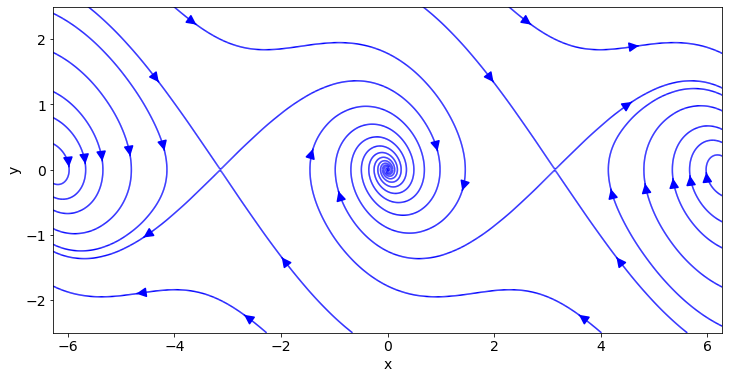

In [10]:
# Define trajectory start points
start=[
       [-np.pi,0.01],[np.pi,-0.01],[-np.pi,-0.01],[np.pi,0.01],
       [-2*np.pi,2.4],[2*np.pi,-2.4],
       [-np.pi,2],[np.pi,2],[-np.pi,-2],[np.pi,-2],
       [-2*np.pi,0.4],[-2*np.pi,0.8],[-2*np.pi,1.2],[-2*np.pi,1.8],
       [2*np.pi,-0.4],[2*np.pi,-0.8],[2*np.pi,-1.2],[2*np.pi,-1.8]
       ]

k=0.4
(U,V)=(Y,-np.sin(X)-k*Y)
plt.figure(figsize=(12,6))
plt.streamplot(X,Y,U,V,start_points=start,density=20,arrowsize=2,integration_direction="forward",color="blue")
plt.streamplot(X,Y,U,V,start_points=start,density=20,arrowsize=2,integration_direction="backward",color="blue")

plt.xlabel('x')
plt.ylabel('y')
plt.show()

The addition of damping does not change the locations of the equilibria, but it dos affect their stability. All solutions decay gradually towards the equilibrium at $(0,0)$. This is represented by an inward-spiralling trajectory on the phase diagram. The pendulum oscillates with decaying amplitude.




## Exercise

```{exercise}
:label: ex-222
The following system is a model of glycolysis, in which $s$ represents the concentration of F6P (fructose-6-phosphate) and $p$ represents the concentration of ADP (adenosine diphosphate):

\begin{align*}
\dot{p}&=c s p^2 - k p\\
\dot{s}&=v_0 - c s p^2
\end{align*}

Produce a phase portrait for this system for the case where $v_0=1$, $k=1$, $c=1.1$, illustrating the behaviour of the solution in the vicinity the equilibrium point.

Try illustrating the behaviour by plotting the vector field and also by plotting some solution trajectories for different initial conditions.

Also try changing the value of $c$ to 0.9. How do the trajectories in the vicinity of the stationary point change?
```

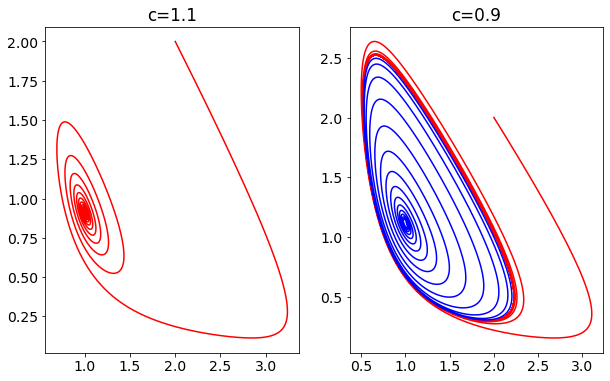

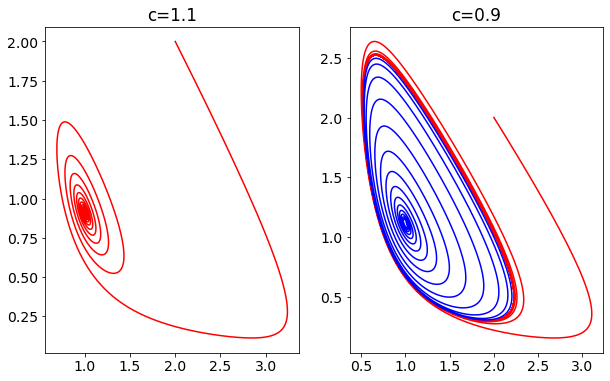

In [11]:
from myst_nb import glue
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# define the model
def glyco(X,t,v0,c,k):
  dpdt = c*X[1]*X[0]**2 - k*X[0]
  dsdt = v0 - c*X[1]*X[0]**2
  return [dpdt,dsdt]

# define the time range and fixed parameters
t = np.linspace(0,100,10000)
v0=1; k=1;

# make plot axes
fig,ax=plt.subplots(1,2,figsize=(10,6))

# Solve for c=1.1
X0=[2,2]
X = odeint(glyco,X0,t,args=(v0,1.1,k))
ax[0].plot(X[:,0],X[:,1],'r')
ax[0].set_title('c=1.1')

# Solve for c=0.9 (red trajectory)
X0=[2,2]
X = odeint(glyco,X0,t,args=(v0,0.9,k))
ax[1].plot(X[:,0],X[:,1],'r')

# Solve for c=0.9 (blue trajectory)
X0=[1.01,1.12]
X = odeint(glyco,X0,t,args=(v0,0.9,k))
ax[1].plot(X[:,0],X[:,1],'b')

ax[1].set_title('c=0.9')
glue("glyco_fig", fig, display=False)

````{toggle}

**Solution:**

There is a stationary point at

\begin{equation*}(p,s)=\left(\frac{v_0}{k},\frac{k^2}{c v_0}\right)\end{equation*}

It is a little easier to see the behaviour clearly by plotting trajectories rather than streamlines.

* For $c=1.1$ the equilibrium point is a stable centre. The red trajectory spirals in towards the equilibrium point.
* For $c=0.9$ the equilibrium point is unstable. The blue trajectory spirals out away from the equilibrium point.

For $c=0.9$ we see that the solution approaches a closed cycle from initial conditions inside (blue) and outside (red). This is called a *limit cycle*.

```{code}
# define the model
def glyco(X,t,v0,c,k):
  dpdt = c*X[1]*X[0]**2 - k*X[0]
  dsdt = v0 - c*X[1]*X[0]**2
  return [dpdt,dsdt]

# define the time range and fixed parameters
t = np.linspace(0,100,10000)
v0=1; k=1;

# make plot axes
fig,ax=plt.subplots(1,2,figsize=(10,6))

# Solve for c=1.1
X0=[2,2]
X = odeint(glyco,X0,t,args=(v0,1.1,k))
ax[0].plot(X[:,0],X[:,1],'r')
ax[0].set_title('c=1.1')

# Solve for c=0.9 (red trajectory)
X0=[2,2]
X = odeint(glyco,X0,t,args=(v0,0.9,k))
ax[1].plot(X[:,0],X[:,1],'r')

# Solve for c=0.9 (blue trajectory)
X0=[1.01,1.12]
X = odeint(glyco,X0,t,args=(v0,0.9,k))
ax[1].plot(X[:,0],X[:,1],'b')

ax[1].set_title('c=0.9')

plt.show()
```

```{glue:} glyco_fig
```

We see that the nature of the equilibrium point depends on parameter $c$, when the other parameters are kept fixed. We will see in a later chapter that the qualitative behaviour of systems can be highly sensitive to small changes in parameter values.

````